**<font size='6' color='red'>ch12.데이터프레임과 시리즈(Pandas) </font>**

# 8절.데이터 그룹화 및 집계

In [234]:
import pandas as pd
import numpy as np 
#import statsmodels.api as sm
from statsmodels.api import datasets
iris_df = datasets.get_rdataset('iris',package='datasets').data
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 8.1 Group by

In [2]:
iris_grouped=iris_df.groupby?

In [5]:
iris_df.groupby([iris_df.Species,iris_df['Sepal.Length']]).mean().head()

Sepal.Width  Petal.Length  Petal.Width
Species Sepal.Length                                        
setosa  4.3              3.000000      1.100000        0.100
        4.4              3.033333      1.333333        0.200
        4.5              2.300000      1.300000        0.300
        4.6              3.325000      1.325000        0.225
        4.7              3.200000      1.450000        0.200

In [6]:
iris_df.pivot_table(index='Species',values=['Sepal.Length','Sepal.Width'])

,Sepal.Length,Sepal.Width
Species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


In [237]:
iris_df.groupby(iris_df.Species)['Sepal.Length'].sum()

Species
setosa        250.3
versicolor    296.8
virginica     329.4
Name: Sepal.Length, dtype: float64

In [7]:
iris_ground=iris_df.groupby(iris_df.Species)['Sepal.Length']
iris_ground

In [8]:
iris_ground.count()

Species
setosa        50
versicolor    50
virginica     50
Name: Sepal.Length, dtype: int64

In [9]:
iris_df.loc[1,'Sepal.Length']=np.nan

In [10]:
import random
rownum=random.sample(range(len(iris_df)),4)
rownum

[141, 58, 0, 96]

In [11]:
for row in rownum:
    iris_df.loc[row,'Sepal.Length']=np.nan

In [12]:
iris_df.loc[rownum,'Sepal.Length']

141   NaN
58    NaN
0     NaN
96    NaN
Name: Sepal.Length, dtype: float64

In [13]:
iris_ground=iris_df.groupby(iris_df.Species)
iris_ground.count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,48,50,50,50
versicolor,48,50,50,50
virginica,49,50,50,50


**다중 열로 그룹화**

In [14]:
iris_df.groupby([iris_df['Species'],iris_df['Sepal.Length']]).mean().head()

Sepal.Width  Petal.Length  Petal.Width
Species Sepal.Length                                        
setosa  4.3              3.000000      1.100000        0.100
        4.4              3.033333      1.333333        0.200
        4.5              2.300000      1.300000        0.300
        4.6              3.325000      1.325000        0.225
        4.7              3.200000      1.450000        0.200

In [15]:
iris_df.groupby([iris_df['Species'],iris_df['Sepal.Length']]).describe()

Sepal.Width                                        \
                              count      mean       std  min    25%   50%   
Species    Sepal.Length                                                     
setosa     4.3                  1.0  3.000000       NaN  3.0  3.000  3.00   
           4.4                  3.0  3.033333  0.152753  2.9  2.950  3.00   
           4.5                  1.0  2.300000       NaN  2.3  2.300  2.30   
           4.6                  4.0  3.325000  0.221736  3.1  3.175  3.30   
           4.7                  2.0  3.200000  0.000000  3.2  3.200  3.20   
           4.8                  5.0  3.180000  0.204939  3.0  3.000  3.10   
           4.9                  3.0  3.266667  0.288675  3.1  3.100  3.10   
           5.0                  8.0  3.362500  0.192261  3.0  3.275  3.40   
           5.1                  7.0  3.614286  0.211570  3.3  3.450  3.70   
           5.2                  3.0  3.666667  0.378594  3.4  3.450  3.50   
           5.3                  1.0  3.700000       NaN  3.7  3.700  3.70   
           5.4                  5.0  3.660000  0.250998  3.4  3.400  3.70   
           5.5                  2.0  3.850000  0.494975  3.5  3.675  3.85   
           5.7                  2.0  4.100000  0.424264  3.8  3.950  4.10   
           5.8                  1.0  4.000000       NaN  4.0  4.000  4.00   
versicolor 4.9                  1.0  2.400000       NaN  2.4  2.400  2.40   
           5.0                  2.0  2.150000  0.212132  2.0  2.075  2.15   
           5.1                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.2                  1.0  2.700000       NaN  2.7  2.700  2.70   
           5.4                  1.0  3.000000       NaN  3.0  3.000  3.00   
           5.5                  5.0  2.440000  0.114018  2.3  2.400  2.40   
           5.6                  5.0  2.820000  0.216795  2.5  2.700  2.90   
           5.7                  4.0  2.800000  0.163299  2.6  2.750  2.80   
           5.8                  3.0  2.666667  0.057735  2.6  2.650  2.70   
           5.9                  2.0  3.100000  0.141421  3.0  3.050  3.10   
           6.0                  4.0  2.800000  0.496655  2.2  2.575  2.80   
           6.1                  4.0  2.875000  0.095743  2.8  2.800  2.85   
           6.2                  2.0  2.550000  0.494975  2.2  2.375  2.55   
           6.3                  3.0  2.700000  0.529150  2.3  2.400  2.50   
           6.4                  2.0  3.050000  0.212132  2.9  2.975  3.05   
           6.5                  1.0  2.800000       NaN  2.8  2.800  2.80   
           6.6                  1.0  3.000000       NaN  3.0  3.000  3.00   
           6.7                  3.0  3.066667  0.057735  3.0  3.050  3.10   
           6.8                  1.0  2.800000       NaN  2.8  2.800  2.80   
           6.9                  1.0  3.100000       NaN  3.1  3.100  3.10   
           7.0                  1.0  3.200000       NaN  3.2  3.200  3.20   
virginica  4.9                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.6                  1.0  2.800000       NaN  2.8  2.800  2.80   
           5.7                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.8                  3.0  2.733333  0.057735  2.7  2.700  2.70   
           5.9                  1.0  3.000000       NaN  3.0  3.000  3.00   
           6.0                  2.0  2.600000  0.565685  2.2  2.400  2.60   
           6.1                  2.0  2.800000  0.282843  2.6  2.700  2.80   
           6.2                  2.0  3.100000  0.424264  2.8  2.950  3.10   
           6.3                  6.0  2.933333  0.350238  2.5  2.725  2.85   
           6.4                  5.0  2.920000  0.216795  2.7  2.800  2.80   
           6.5                  4.0  3.050000  0.100000  3.0  3.000  3.00   
           6.7                  5.0  3.040000  0.328634  2.5  3.000  3.10   
           6.8                  2.0  3.100000  0.141421  3.0  3.050  3.10   
           6.9      

In [33]:
g=iris_df.groupby(iris_df.Species).mean()#.plot(kind='bar')
g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006250,3.428,1.462,0.246
versicolor,5.927083,2.770,4.260,1.326
virginica,6.581633,2.974,5.552,2.026


https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot 

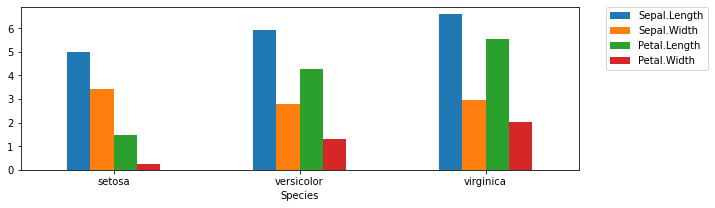

In [30]:
import matplotlib.pyplot as plt
g.plot(kind='bar',rot=0,figsize=(10,3)) #rot 가로 명 ,figsize =(10,3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [37]:
iris_df.groupby(iris_df.Species).describe().T #transpose()

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [45]:
g=iris_df.groupby([iris_df['Species'],iris_df['Petal.Width']]).mean()
g

Sepal.Length  Sepal.Width  Petal.Length
Species    Petal.Width                                         
setosa     0.1              4.820000     3.360000      1.380000
           0.2              4.972414     3.379310      1.444828
           0.3              4.971429     3.328571      1.428571
           0.4              5.300000     3.785714      1.571429
           0.5              5.100000     3.300000      1.700000
           0.6              5.000000     3.500000      1.600000
versicolor 1.0              5.414286     2.371429      3.628571
           1.1              5.400000     2.466667      3.566667
           1.2              5.780000     2.740000      4.240000
           1.3              5.884615     2.746154      4.176923
           1.4              6.357143     2.957143      4.500000
           1.5              6.190000     2.880000      4.580000
           1.6              6.100000     3.133333      4.766667
           1.7              6.700000     3.000000      5.000000
           1.8              5.900000     3.200000      4.800000
virginica  1.4              6.100000     2.600000      5.600000
           1.5              6.150000     2.500000      5.050000
           1.6              7.200000     3.000000      5.800000
           1.7              4.900000     2.500000      4.500000
           1.8              6.445455     2.918182      5.381818
           1.9              6.340000     2.680000      5.320000
           2.0              6.650000     3.016667      5.550000
           2.1              6.916667     3.033333      5.783333
           2.2              6.866667     3.200000      6.033333
           2.3              6.912500     3.087500      5.700000
           2.4              6.266667     3.100000      5.433333
           2.5              6.733333     3.400000      5.933333

In [46]:
g.unstack()#끝에있는 인덱스 Petal.Width가 컬럼값 

Sepal.Length                                                    \
Petal.Width          0.1       0.2       0.3  0.4  0.5  0.6       1.0  1.1   
Species                                                                      
setosa              4.82  4.972414  4.971429  5.3  5.1  5.0       NaN  NaN   
versicolor           NaN       NaN       NaN  NaN  NaN  NaN  5.414286  5.4   
virginica            NaN       NaN       NaN  NaN  NaN  NaN       NaN  NaN   

                             ... Petal.Length                             \
Petal.Width   1.2       1.3  ...          1.6  1.7       1.8   1.9   2.0   
Species                      ...                                           
setosa        NaN       NaN  ...          NaN  NaN       NaN   NaN   NaN   
versicolor   5.78  5.884615  ...     4.766667  5.0  4.800000   NaN   NaN   
virginica     NaN       NaN  ...     5.800000  4.5  5.381818  5.32  5.55   

                                                          
Petal.Width       2.1       2.2  2.3       2.4       2.5  
Species                                                   
setosa            NaN       NaN  NaN       NaN       NaN  
versicolor        NaN       NaN  NaN       NaN       NaN  
virginica    5.783333  6.033333  5.7  5.433333  5.933333  

[3 rows x 66 columns]

In [47]:
g.unstack().T

Species                     setosa  versicolor  virginica
             Petal.Width                                 
Sepal.Length 0.1          4.820000         NaN        NaN
             0.2          4.972414         NaN        NaN
             0.3          4.971429         NaN        NaN
             0.4          5.300000         NaN        NaN
             0.5          5.100000         NaN        NaN
...                            ...         ...        ...
Petal.Length 2.1               NaN         NaN   5.783333
             2.2               NaN         NaN   6.033333
             2.3               NaN         NaN   5.700000
             2.4               NaN         NaN   5.433333
             2.5               NaN         NaN   5.933333

[66 rows x 3 columns]

<AxesSubplot:>

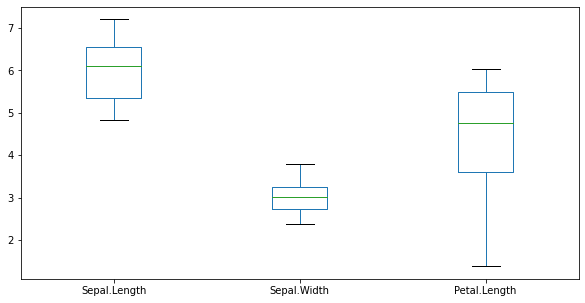

In [48]:
g.plot.box(figsize=(10,5))

In [50]:
g=iris_df.groupby([iris_df['Species'],iris_df['Petal.Width']])['Sepal.Length'].mean()


Species     Petal.Width
setosa      0.1            4.820000
            0.2            4.972414
            0.3            4.971429
            0.4            5.300000
            0.5            5.100000
            0.6            5.000000
versicolor  1.0            5.414286
            1.1            5.400000
            1.2            5.780000
            1.3            5.884615
            1.4            6.357143
            1.5            6.190000
            1.6            6.100000
            1.7            6.700000
            1.8            5.900000
virginica   1.4            6.100000
            1.5            6.150000
            1.6            7.200000
            1.7            4.900000
            1.8            6.445455
            1.9            6.340000
            2.0            6.650000
            2.1            6.916667
            2.2            6.866667
            2.3            6.912500
            2.4            6.266667
            2.5            6.733333
Name

In [239]:
g.unstack()

Petal.Width,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,...,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
Species,,,,,,,,,,,,,,,,,,,,,
setosa,4.82,4.972414,4.971429,5.3,5.1,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,5.414286,5.4,5.78,5.884615,...,6.1,6.7,5.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.2,4.9,6.445455,6.34,6.65,6.916667,6.866667,6.9125,6.266667,6.733333


In [240]:
import pandas as pd
pd.options.display.max_columns


20

In [241]:
pd.options.display.max_columns = 22

In [242]:
g.unstack()

Petal.Width,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
Species,,,,,,,,,,,,,,,,,,,,,,
setosa,4.82,4.972414,4.971429,5.3,5.1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,5.414286,5.4,5.78,5.884615,6.357143,6.19,6.1,6.7,5.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.100000,6.15,7.2,4.9,6.445455,6.34,6.65,6.916667,6.866667,6.9125,6.266667,6.733333


In [58]:
g.unstack().T

Species,setosa,versicolor,virginica
Petal.Width,,,
0.1,4.820000,NaN,NaN
0.2,4.972414,NaN,NaN
0.3,4.971429,NaN,NaN
0.4,5.300000,NaN,NaN
0.5,5.100000,NaN,NaN
0.6,5.000000,NaN,NaN
1.0,NaN,5.414286,NaN
1.1,NaN,5.400000,NaN
1.2,NaN,5.780000,NaN


## 8.2 그룹간 데이터

In [97]:
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [161]:
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [96]:
iris_group=iris_df.groupby(iris_df.Species)
iris_group

In [66]:
for idx,grouped in enumerate(iris_group):
    print(idx,'번쨰 그룹은')
    print(grouped)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')


0 번쨰 그룹은
('setosa',     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14   

In [71]:
for idx,(specie_name,group) in enumerate(iris_group):
    print(idx,'번쨰 그룹은',specie_name)
    print(group.sample(5).sort_index())
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

0 번쨰 그룹은 setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
6            4.6          3.4           1.4          0.3  setosa
11           4.8          3.4           1.6          0.2  setosa
22           4.6          3.6           1.0          0.2  setosa
31           5.4          3.4           1.5          0.4  setosa
38           4.4          3.0           1.3          0.2  setosa
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 번쨰 그룹은 versicolor
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
76           6.8          2.8           4.8          1.4  versicolor
80           5.5          2.4           3.8          1.1  versicolor
81           5.5          2.4           3.7          1.0  versicolor
95           5.7          3.0           4.2          1.2  versicolor
97           6.2          2.9           4.3          1.3  versicolor
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2 번쨰 그룹은 virginica
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
11

## 8.3데이터 프레임 그룹 인덱싱

In [79]:
t=iris_df.groupby(iris_df.Species).take([1,11,21,31])# 각 종별 1,11,21,31번쨰 가져오기
t.loc['setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,4.9,3.0,1.4,0.2
11,4.8,3.4,1.6,0.2
21,5.1,3.7,1.5,0.4
31,5.4,3.4,1.5,0.4


## 레이블(원핫인코딩)

In [80]:
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [81]:
iris_df.Species.describe()

count        150
unique         3
top       setosa
freq          50
Name: Species, dtype: object

In [88]:
#레이블을 지원하는 패키지 지용
from sklearn.preprocessing import LabelEncoder #sklearn 폴더안에 preprocessing 함수안에 label클래스
le = LabelEncoder()
iris_df['species']=le.fit_transform(iris_df['Species'])
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


# 9절 데이터 구조 변경

## 9.1 와이드 포맷 vs 롱 포맷
https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
- [Tidy Data 란?] (https://vita.had.co.nz/papers/tidy-data.pdf) 

In [201]:
import statsmodels.api as sm
# package생략시 datasets
airquality_data = sm.datasets.get_rdataset("airquality")
airquality = airquality_data.data
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## 9.2 melt를 이용한 언피벗팅

In [162]:
airquality_melted=airquality.melt(id_vars=['Month','Day'])
airquality_melted

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [243]:
airquality.melt(id_vars=['Month','Day'], 
                var_name="변수",
                value_name="값")

,Month,Day,변수,값
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [163]:
airquality.sample()

,Ozone,Solar.R,Wind,Temp,Month,Day
141,24.0,238.0,10.3,68,9,19


In [164]:
airquality_melted_sort=airquality_melted.sort_values(by=['Month','Day'])
airquality_melted_sort

,Month,Day,variable,value
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0
1,5,2,Ozone,36.0
...,...,...,...,...
610,9,29,Temp,76.0
152,9,30,Ozone,20.0
305,9,30,Solar.R,223.0
458,9,30,Wind,11.5


In [244]:
airquality.head(1)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1


In [245]:
import pandas as pd
airquality.melt(id_vars=['Month','Day']) # pd.melt(airquality,id_vars=['Month','Day'])

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


## 9.3 pivot_table을 이용한 피벗팅(롱형 ->와이드 형)

In [266]:
# 멜트된 데이터 프레임 : airquality_melted , airquality_melted_sort
airquality2 = airquality_melted.pivot_table(index=["Month","Day"],
                             columns=["variable"],
                             values=["value"])
airquality2.head()

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3

In [267]:
airquality2.loc[5].head()

value                    
variable Ozone Solar.R  Temp  Wind
Day                               
1         41.0   190.0  67.0   7.4
2         36.0   118.0  72.0   8.0
3         12.0   149.0  74.0  12.6
4         18.0   313.0  62.0  11.5
5          NaN     NaN  56.0  14.3

In [268]:
airquality2 = airquality2.reset_index(level=['Month','Day'],
                                     col_level=1)
airquality2

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3
..         ...  ..   ...     ...   ...   ...
148          9  26  30.0   193.0  70.0   6.9
149          9  27   NaN   145.0  77.0  13.2
150          9  28  14.0   191.0  75.0  14.3
151          9  29  18.0   131.0  76.0   8.0
152          9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

In [269]:
airquality2.columns

MultiIndex([(     '',   'Month'),
            (     '',     'Day'),
            ('value',   'Ozone'),
            ('value', 'Solar.R'),
            ('value',    'Temp'),
            ('value',    'Wind')],
           names=[None, 'variable'])

In [270]:
airquality2.columns = airquality2.columns.droplevel(level=0)
airquality2

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [271]:
# airquality_melted_sort 데이터 프레임을 와이드형으로 피벗팅
airquality3 = airquality_melted_sort.pivot_table(index=['Month','Day'],
                                                columns=['variable'],
                                                values=['value'])
airquality3

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3
...         ...     ...   ...   ...
9     26   30.0   193.0  70.0   6.9
      27    NaN   145.0  77.0  13.2
      28   14.0   191.0  75.0  14.3
      29   18.0   131.0  76.0   8.0
      30   20.0   223.0  68.0  11.5

[153 rows x 4 columns]

In [272]:
airquality3 = airquality3.reset_index(level=['Month','Day'],
                                     col_level=1)
airquality3.head(1)

value                   
variable Month Day Ozone Solar.R  Temp Wind
0            5   1  41.0   190.0  67.0  7.4

In [273]:
airquality3.columns = airquality3.columns.droplevel(level=0)
airquality3.head()

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


In [274]:
import numpy as np
a = None
print(a)

None


In [275]:
if a is None:
    print('a==None')
else:
    print('a가 None이 아닙니다')

a==None


# 연습문제!

In [276]:
# 주택도시보증공사_전국 평균 분양가격(2019년 12월).csv 을   df_last 변수에 
# 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv 을 df_first변수 입력받음
# df_last랑 df_first랑 concat하기 위해 df_first를 df_last를 참조하여 변환합니다.

# 단, 시간별 평당분양가격의 추이, 지역별 평당분양가격의 추이를 분석할 예정입니다.

In [278]:
import pandas as pd
df_last = pd.read_csv('data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv',encoding='cp949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [279]:
import pandas as pd
df_first = pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',encoding='cp949')
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [280]:
df_first_melted=df_first.melt(id_vars=['지역'] ,var_name='날짜',value_name='분양가격')
df_first_melted.head()

,지역,날짜,분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [281]:
df_first_melted.rename(columns={'지역':'지역명'},inplace=True)
df_first_melted

,지역명,날짜,분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [351]:
df_last_after=df_last.iloc[:,[0,2,3,4]]
df_last_after.rename(columns={'분양가격(㎡)':'분양가격'},inplace=True)
df_last_after

C:\Users\tjoeun\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,지역명,연도,월,분양가격
0,서울,2015,10,5841
1,서울,2015,10,5652
2,서울,2015,10,5882
3,서울,2015,10,5721
4,서울,2015,10,5879
...,...,...,...,...
4330,제주,2019,12,3882
4331,제주,2019,12,NaN
4332,제주,2019,12,3898
4333,제주,2019,12,NaN


In [352]:
member_df['BirthYear']=2021-member_df['Age']+1#자주사용~!

NameError: name 'member_df' is not defined

In [353]:
df_last_after

,지역명,연도,월,분양가격
0,서울,2015,10,5841
1,서울,2015,10,5652
2,서울,2015,10,5882
3,서울,2015,10,5721
4,서울,2015,10,5879
...,...,...,...,...
4330,제주,2019,12,3882
4331,제주,2019,12,NaN
4332,제주,2019,12,3898
4333,제주,2019,12,NaN


In [354]:
df_last_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     4335 non-null   object
 1   연도      4335 non-null   int64 
 2   월       4335 non-null   int64 
 3   분양가격    4058 non-null   object
dtypes: int64(2), object(2)
memory usage: 135.6+ KB


In [356]:
df_last_after=df_last_after.astype(str)

In [357]:
df_last_after['날짜']=df_last_after['연도']+'년'+df_last_after['월']+'월'

In [359]:
df_last_after.drop(labels=['연도','월'],axis=1,inplace=True)
df_last_after

,지역명,분양가격,날짜
0,서울,5841,2015년10월
1,서울,5652,2015년10월
2,서울,5882,2015년10월
3,서울,5721,2015년10월
4,서울,5879,2015년10월
...,...,...,...
4330,제주,3882,2019년12월
4331,제주,nan,2019년12월
4332,제주,3898,2019년12월
4333,제주,nan,2019년12월


In [345]:
df_first_melted.rename(columns={'지역':'지역명'},inplace=True)
df_first_melted

,지역명,날짜,분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [360]:
result=pd.concat([df_last_after,df_first_melted])
result.sort_index(inplace=True,axis=1)
result

,날짜,분양가격,지역명
0,2015년10월,5841,서울
1,2015년10월,5652,서울
2,2015년10월,5882,서울
3,2015년10월,5721,서울
4,2015년10월,5879,서울
...,...,...,...
352,2015년8월,6580,전북
353,2015년8월,6289,전남
354,2015년8월,7037,경북
355,2015년8월,7665,경남


In [ ]:
# 데이터프레임의 구조를 바꾸는 함수들 : melt, pivot_table(연산o),pivot(연산x)

In [362]:
import numpy as np
year=[2020,2020,2020,2021,2021,2021]
mon=[1,2,3]*2
latte=[410,401,402,400,404,405]
americano=[500,483,484,470,486,488]
mocha=[350,299,300,301,302,300]
sales=pd.DataFrame(np.c_[year,mon,latte,americano,mocha],
                  columns=['year','mon','latte','americano','mocha'])
sales

,year,mon,latte,americano,mocha
0,2020,1,410,500,350
1,2020,2,401,483,299
2,2020,3,402,484,300
3,2021,1,400,470,301
4,2021,2,404,486,302
5,2021,3,405,488,300


In [365]:
sales_melted=sales.melt(id_vars=['year','mon'])
sales_melted.head(1)

,year,mon,variable,value
0,2020,1,latte,410


In [366]:
sale2=sales_melted.pivot_table(index=['year','mon'],
                              columns=['variable'],
                              values=['value'])# aggfunc='mean', 데이터가 하나 있으니깐 의미없습니당
sale2

value            
variable americano latte mocha
year mon                      
2020 1         500   410   350
     2         483   401   299
     3         484   402   300
2021 1         470   400   301
     2         486   404   302
     3         488   405   300

In [369]:
latte_sales=sales.loc[:,'year':'latte']
latte_sales

,year,mon,latte
0,2020,1,410
1,2020,2,401
2,2020,3,402
3,2021,1,400
4,2021,2,404
5,2021,3,405


In [372]:
latte_sales.pivot('year','mon')#year는 index로 , mon은 column으로 

latte          
mon      1    2    3
year                
2020   410  401  402
2021   400  404  405

# 10절. 데이터프레임에 함수적용 시키기

## 10.1 apply
- 데이터프레임이나 시리즈에 각 열또는 각 행에 함수 적용

In [4]:
import statsmodels.api as sm
iris_df = sm.datasets.get_rdataset('iris',package='datasets').data #iris데이터를 불러드렸습니다.
iris_df.sample()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
17,5.1,3.5,1.4,0.3,setosa


In [5]:
#독립변수
iris_df.iloc[:,:-1].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
X=iris_df.loc[:,'Sepal.Length':'Petal.Width']

In [10]:
X.apply(np.round)#모든 행에 round적용을 하였습니다.

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


In [11]:
X.apply(np.sum, axis=0)# 열별 

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [12]:
X.apply(np.sum, axis=1) #행별

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [13]:
#각 데이터와 평균과의 거리를 출력 
avg=X.apply(np.average)
X.apply(lambda x:x-avg,axis=1)# 열단위로 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [396]:
#각 데이터와 평균과의 거리를 출력 
#result_type='broadcast':출력타입을 원본데이터(x) 그대로
avg=X.apply(np.average)
X.apply(lambda x:list(x-avg),axis=1,result_type='broadcast')# 열단위로 삭제

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [400]:
new_first=df_first_melted
new_first.head()

,지역명,날짜,분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [403]:
date='2021년3월'
date.split('년')

['2021', '3월']

In [404]:
def parse_year(x):
    return int(x.split('년')[0])
parse_year(date)

2021

In [405]:
def parse_month(x):
    return int(x.split('년')[-1].replace("월",""))
parse_month(data)

3

In [406]:
new_first.sample()

,지역명,날짜,분양가격
244,울산,2015년2월,8526


In [407]:
new_first['연도']=new_first['날짜'].apply(lambda x :int(x.split('년')[0]))

In [408]:
new_first['월']=new_first['날짜'].apply(lambda x :int(x.split('년')[-1].replace("월","")))

In [410]:
new_first.head(2)

,지역명,날짜,분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12


## 10.2 applymap
- apply : 행 또는 열단위로 함수적용 (데이터 프레임이나 시리즈 적용 가능)
- applymap: 각 요소 하나하나 별로 적용(데이터프레임에서만 가능)

In [412]:
X.apply(np.sum)

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [419]:
X.applymap(lambda x : x**2)#요소요소별로 작동

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


## 10.3 map
- 시리즈타입의 벡터만 가능

In [423]:
new_first['연도']=new_first['날짜'].map(lambda x : int(x.split('년')[0]))

,지역명,날짜,분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


In [427]:
x = pd.Series(['홍길동',20,'서울 마포'],index=['Name','Age','Address'])
x

Name         홍길동
Age           20
Address    서울 마포
dtype: object

In [430]:
def my_func(data):
    return data,len(str(data))
my_func("홍길동")

('홍길동', 3)

In [436]:
x.map(my_func)

Name         (홍길동, 3)
Age           (20, 2)
Address    (서울 마포, 5)
dtype: object

In [433]:
x.map(lambda data:(data,len(str(data))))

Name         (홍길동, 3)
Age           (20, 2)
Address    (서울 마포, 5)
dtype: object

In [435]:
#딕셔너리를 map에 적용하면 딕셔너리의 키별로 시리즈 값이 적용
dic = {"홍길동":"김길동",20:25,"마포":"서대문"}
x.map(dic)

Name       김길동
Age         25
Address    NaN
dtype: object

In [437]:
s= pd.Series([1,2,3,4,None])

In [439]:
s.map(lambda x :(x,x**2))

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4     (nan, nan)
dtype: object

In [441]:
# 연산적용이 안되는 부분은 무시하라
s.map(lambda x: (x,x**2),na_action='ignore')

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4            NaN
dtype: object

# 11절. 일괄 변경하기(결측치나 특정값)

## 11.1 fillna(결측치를 어떤 측정값으로 바꿔라)

In [446]:
import numpy as np
df=pd.DataFrame([[np.nan,2,np.nan,0],
               [3,4,np.nan,1],
               [np.nan,3,np.nan,5],
               [np.nan,3,np.nan,4]],
               columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [447]:
# 모든 결측치를 0으로 채움
df.fillna(0)

,A,B,C,D
0,0.0,2,0.0,0
1,3.0,4,0.0,1
2,0.0,3,0.0,5
3,0.0,3,0.0,4


In [449]:
# 결측치가 아닌 이전값 또는 다음값으로 채움
    #pad / ffill : 결측치가 아닌 이전값으로 채움
    #backfill / bfill : 결측치가 아닌 다음값으로 채움 
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [450]:
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [452]:
values={"A":99,"B":98,"C":97,"D":95} #열별 결측치 대체값 
df.fillna(value=values)

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,97.0,4


In [455]:
df.fillna(value=df.mean())# 모두 결측치가 있는 C컬럼은 결측치 대체가 안 됨

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [459]:
mean=df.mean()
from math import isnan
for idx,value in mean.items():
    if isnan(value):
        mean[idx]=0
mean

A    3.0
B    3.0
C    0.0
D    2.5
dtype: float64

In [460]:
df.fillna(value=mean)

,A,B,C,D
0,3.0,2,0.0,0
1,3.0,4,0.0,1
2,3.0,3,0.0,5
3,3.0,3,0.0,4


In [461]:
df.fillna(value=values,limit=2) #limit 결측치 2번쨰 까지만 대체

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,NaN,5
3,NaN,3,NaN,4


## 11.2 replace(to_value,new_value,inplace=False)
        - to_value를 new_value로 변경
        - inplace=False : 변경된 내용을 반환, 데이터프레임을 적용하지 않음
        - inplace=True : 변경된 내용이 데이터 프레임에 적용되고 반환값은 없음

In [462]:
s= pd.Series([0,1,2,3,4,None])
s.replace(0,5,inplace=True)

In [463]:
s.replace(np.nan,3)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
5    3.0
dtype: float64

In [464]:
df=pd.DataFrame({'A':[0,1,2,3,4],
               'B':[5,6,7,8,9,],
               'C':['a','b','c','d','e']})
df

,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [473]:
print(df.replace([0,1,2,3],99))
print()
print(df.replace([0,1,2,3],[99,98,97,96])) #리스트 형태로도 가능합니다
df.replace(range(4),range(4,0,-1))#[0,1,2,3] 를 [4,3,2,1]로 대체
df.replace({'A':0,'B':7},99)#A열의 0과 B열의 7를 99로 대체

    A  B  C
0  99  5  a
1  99  6  b
2  99  7  c
3  99  8  d
4   4  9  e

    A  B  C
0  99  5  a
1  98  6  b
2  97  7  c
3  96  8  d
4   4  9  e


,A,B,C
0,99,5,a
1,1,6,b
2,2,99,c
3,3,8,d
4,4,9,e


In [474]:
df=pd.DataFrame({'A':['bat','foo','bait'],
                'B':['abc','bar','xyz']})
df

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


In [ ]:
# to_value에 정규표현식이 사용된 경우(ba로 시작하고 마지막 임의의 문자가 있는 문자열을 )
df.replace(to_replace==r'^ba.$',value='newBar',regex=True)#정규표현식이 올경우에는 regex를 해야 to_replace를 인지함! 

In [475]:
df.replace({'A':r'^ba.$'},{'A':'newBar'},regex=True)

,A,B
0,newBar,abc
1,foo,bar
2,bait,xyz


# 에러 where,mask 제대로 보기

## 11.3 where,mask
- where ; 조건이 만족하는 요소는 그대로 출력 (반대로)mask

In [485]:
s= pd.Series([0,1.0,2,3,4])

In [486]:
s.where(s>0) # 조건이 만족하는 값만 보이고

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [487]:
s.mask(s>0,99)

0     0.0
1    99.0
2    99.0
3    99.0
4    99.0
dtype: float64

In [488]:
s.mask(s>0,-s)

0    0.0
1   -1.0
2   -2.0
3   -3.0
4   -4.0
dtype: float64

## 11.4 dropna
- 결측치 있는 데이터를 누락시킴

In [498]:
df=pd.DataFrame({"name":['박','김','최',np.nan],
                "age":[np.nan,20,60,np.nan],
                "born":[None,'서울',np.nan,np.nan]})
df

,name,age,born
0,박,NaN,None
1,김,20.0,서울
2,최,60.0,NaN
3,NaN,NaN,NaN


In [499]:
print(df.dropna()) #결측치가 있는 행 제거
print(df.dropna(how='all',inplace=True)) #행의 모든 열의 데이터가 다 결측치인 행만 제거
df

  name   age born
1    김  20.0   서울
None


,name,age,born
0,박,NaN,None
1,김,20.0,서울
2,최,60.0,NaN


In [500]:
df.dropna(axis=1) #결측치가 있는 열들 제거
df.dropna(axis='columns')

,name
0,박
1,김
2,최


In [501]:
#결측치가 2개 이상인 행만 제거
df.dropna(thresh=2)

,name,age,born
1,김,20.0,서울
2,최,60.0,NaN


## 11.5 astype
- 판다스의 dtype 속성을 변경

In [504]:
new_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     357 non-null    object
 1   날짜      357 non-null    object
 2   분양가격    357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.1+ KB


In [508]:
#int64 타입인 "월" columns을 문자 타입으로 변경
new_first['월']=new_first['월'].astype('str')

In [509]:
new_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     357 non-null    object
 1   날짜      357 non-null    object
 2   분양가격    357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    object
dtypes: int64(2), object(3)
memory usage: 14.1+ KB


In [512]:
new_first['평당가격']=new_first['분양가격'].astype('float64',copy=True)#copy=True를 작성하지 않으면 '분양가격'에 영향을 미치게 됨!
#new_first['평당가격']이 바꿔도 new_first['분양가격']에 영행를 미치지 않습니다!

# 12절. 시리즈

In [516]:
s = pd.Series([1000,2000,2500,3000,4000],index=['apple','banana','mango','cherry','orange'])
s

apple     1000
banana    2000
mango     2500
cherry    3000
orange    4000
dtype: int64

In [518]:
print(s['mango':'orange'])
print(s[['mango','orange']])
s.drop('mango')#출력만되었고 정말 삭제되지는 않았음 inplace=True했을시 삭제

mango     2500
cherry    3000
orange    4000
dtype: int64


mango     2500
orange    4000
dtype: int64

In [ ]:
print(s.sort_value())
print(s.sort_value(ascending=False))#내림차순 정렬 

In [521]:
print(type(s))
print(s.to_frame())
print(type(s))
s.to_frame().T

<class 'pandas.core.series.Series'>
           0
apple   1000
banana  2000
mango   2500
cherry  3000
orange  4000
<class 'pandas.core.series.Series'>


,apple,banana,mango,cherry,orange
0,1000,2000,2500,3000,4000
